# "Implémentez un modèle de scoring"

References used for this notebook:

Kernel pour le feature engineering : LightGBM with Simple Features
- "https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features/script"
- 

    

# Milestone 1 : Choix d’un Kernel

## Notebook de préparation du jeu de données et de feature engineering

### 1.1. Import linrary

In [5]:
%load_ext autoreload
%autoreload

import warnings
warnings.filterwarnings("ignore")

from scripts import *
from scripts_utils import * 

# pd.set_op÷tion("display.max_rows", None)
# pd.set_option("display.max_columns", None)

### 1.2. Mergin, Feature Engineering and Saving the Dataset

In [2]:
# merge dataFrame
df = main()
# save the dataframe for processing 
with timer("start saving data..."):
    df.to_csv('out.csv', index=False)  

df.head()

Train samples: 307511, test samples: 48744
Application df shape: (356251, 247)
Process application train and test - done in 12s
Bureau df shape: (305811, 116)
Process bureau and bureau_balance - done in 48s
Previous applications df shape: (338857, 249)
Process previous_applications - done in 43s
Pos-cash balance df shape: (337252, 18)
Process POS-CASH balance - done in 20s
Installments payments df shape: (339587, 26)
Process installments payments - done in 43s
Credit card balance df shape: (103558, 141)
Process credit card balance - done in 48s
start saving data... - done in 349s


,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Milestone 2 : Développement et simulation de modèles
## Notebook de simulation et comparaison des modèles

In [3]:
with timer("start reading data..."):
    df = pd.read_csv('../notebook/out.csv')

start reading data... - done in 46s


In [4]:
# set new index
df.set_index('SK_ID_CURR', inplace = True)

In [5]:
df.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.1. Data Processing  - clean up, remove infinite and replace NaN values

In [6]:
# clean up, remove infinite and replace NaN values
# use mean() to fill missing values
df = infinity_na_values_table(df, fill_method=4)
df.head()


checking for infinity

printing the count of infinity values
It contains 21 infinite values

printing column name where infinity is present
PREV_APP_CREDIT_PERC_MAX          PREV_APP_CREDIT_PERC_MAX
REFUSED_APP_CREDIT_PERC_MAX    REFUSED_APP_CREDIT_PERC_MAX
INSTAL_PAYMENT_PERC_MAX            INSTAL_PAYMENT_PERC_MAX
dtype: object

printing row index with infinity 
Int64Index([106652, 170117, 191663, 203360, 214375, 247019, 249387, 262837,
            276278, 293754, 330828, 333092, 373540, 376062, 416262, 422089,
            432795, 439267, 453803, 119813],
           dtype='int64', name='SK_ID_CURR')

printing the count of Nan values
It contains 72051237 NaN values

No. of columns not containing null values
180

printing column name where NaN is present
AMT_ANNUITY                                              AMT_ANNUITY
AMT_GOODS_PRICE                                      AMT_GOODS_PRICE
DAYS_EMPLOYED                                          DAYS_EMPLOYED
OWN_CAR_AGE                 

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
100003,0.0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
100004,0.0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683
100006,0.0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,6.000000
100007,0.0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.047597,0.003583,0.106781,0.002955,0.0,0.0,0.0,0.0,0.0,37.083683


### 2.2 Splitting Dataset into Train/Test Sets
We'll be splitting a dataset into train set(80% samples) and test set (20% samples).

In [7]:
# Divide in training/validation and test data
train_df = df[df['TARGET'] != 3]
test_df = df[df['TARGET'] == 3].drop(['TARGET'], axis=1)
print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

Starting LightGBM. Train shape: (307507, 796), test shape: (48744, 795)


In [8]:
##### Pandas Get a List Of All Data Frames loaded into memory
%who_ls DataFrame 

['df', 'test_df', 'train_df']

We'll split the "train_df" data in x_train and x_test.
- x_train will be used with cross-validation to find the best model and for hyperparameter tuning.
- x_test will be used to evaluate the performance of the best models.

In [9]:
##### Pandas Get a List Of All Data Frames loaded into memory
%who_ls DataFrame
X_train = train_df.drop(['TARGET'], axis=1)
Y_train = train_df['TARGET']
X_test = test_df
del df
%who_ls DataFrame 

['X_test', 'X_train', 'test_df', 'train_df']

In [10]:
print('Dataset Train/Test Sizes  : ',X_train.shape, Y_train.shape, X_test.shape)

Dataset Train/Test Sizes  :  (307507, 795) (307507,) (48744, 795)


In [11]:
from sklearn.model_selection import train_test_split

# Splitting a training set and a test set
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                          train_size=0.8, shuffle=True,
                                          stratify=Y_train,
                                          random_state=14)

# del X_train, Y_train

In [12]:
%who_ls DataFrame 

['X_test', 'X_train', 'test_df', 'train_df', 'x_test', 'x_train']

In [13]:
print('Dataset Train/Test Sizes  : ',x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Dataset Train/Test Sizes  :  (246005, 795) (61502, 795) (246005,) (61502,)


### 2.2.1 Visualize the target variable

You can clearly see that there is a huge difference between the data set, the classes are imbalanced. Class imbalance can lead to problems with training machine learning models because the models may be biased towards the more common class. If there are more examples of one class than another, the model will be more likely to learn and predict the majority class. This can be a problem because it can lead to inaccurate results when the model is applied to data that is more evenly balanced.

0.0    282682
1.0     24825
Name: TARGET, dtype: int64

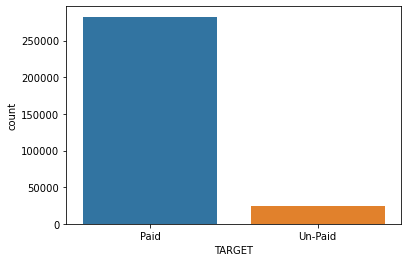

In [14]:
# visualize the target variable
g = sns.countplot(train_df['TARGET'])
g.set_xticklabels(['Paid','Un-Paid']);

train_df.loc[:, 'TARGET'].value_counts()

We see clearly that the classes are umbalaced. Before processing the data we will need to fix this issue. However let's continue with this umbaled data and run the model to see their performances and then fix the umbalanced problem and run agian the models.

### 2.2.5 The Metric Trap [1](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)


One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

Metrics that can provide better insight are:

- Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
- Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
- Recall: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
- F1: Score: the weighted average of precision and recall.
- Area Under ROC Curve (AUROC): AUROC represents the likelihood of your model distinguishing observations from two classes.

In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

Let’s do this experiment, using simple DummyClassifier:

Below we are initializing the defaults DummyClassifier model, training it and checking its performance on test data.



In [15]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

dum_class = DummyClassifier(strategy='most_frequent',random_state=14)

dum_class.fit(x_train, y_train)

# predict
dum_y_predict = dum_class.predict(x_test)

# accuracy score
dum_score = dum_class.score(dum_y_predict, y_test)

print ("Predicting Test Set...")

print(dum_y_predict[:15])
print(y_test[:15].values)
print()

print('Test Accuracy score is: %.6f'%(dum_y_predict == y_test).mean())
print('Test Accuracy score is: %.6f'%dum_class.score(dum_y_predict, y_test)) ## Score method also evaluates accuracy for classification models.
print('Training Accuracy score is: %.6f'%dum_class.score(x_train, y_train))
print()
print(classification_report(y_test, dum_y_predict))

Predicting Test Set...
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Test Accuracy score is: 0.919271
Test Accuracy score is: 0.919271
Training Accuracy score is: 0.919270

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56537
         1.0       0.00      0.00      0.00      4965

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502



We can see 92% accuracy, we are getting very high accuracy because it is predicting mostly the majority class that is 0 (Paid, no default).
We can see above that DummyClassifier is performing quite bad in guessing class 1 as both precision and recall are really bad.


**Classification Report**
Classification report metrics provides precision, recall, f1-score and support for each class.

Precision - It represents how many of predictions of particular class are actually of that class. 
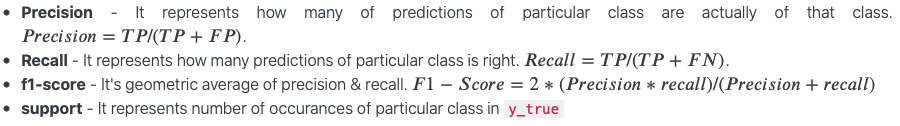

Below we are initializing defaults LogisticRegression model, training it and checking its performance on test data.


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import sklearn.metrics as metrics

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', LogisticRegression())
])

grid = GridSearchCV(estimator=pipe,
                    param_grid={},
                    cv=2,
                    scoring={'acc': make_scorer(accuracy_score)},
                    refit='acc',
                    return_train_score=True)

grid.fit(x_train, y_train);


In [17]:
import pandas as pd
pd.DataFrame(grid.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_acc,split1_test_acc,mean_test_acc,std_test_acc,rank_test_acc,split0_train_acc,split1_train_acc,mean_train_acc,std_train_acc
0,19.108193,2.52047,2.179022,0.603406,{},0.919091,0.919424,0.919258,0.000166,1,0.920107,0.919644,0.919876,0.000231


In [18]:
pd.DataFrame(grid.cv_results_)[['mean_test_acc', 'mean_train_acc']]

,mean_test_acc,mean_train_acc
0,0.919258,0.919876


In [19]:
from collections import Counter
Counter(y_train)


Counter({1.0: 19860, 0.0: 226145})

There is a substantial class unbalanced. What the algorithm is doing is that it prediction the class zero and not learning anything in particular, this can be seen looking at the score 0,92 which is too high and suspicions.

### 2.3.1 Compare DummyClassifier with GridSeach : Grid Search To Improve Model Performance On Unbalanced Dataset

Let's run a dummy model in a gridsearch so we can compare with our original result.
Parameters<br>
    ----------<br>
strategy : {"most_frequent", "prior", "stratified", "uniform", "constant"}, default="prior"
Strategy to use to generate predictions.
- "most_frequent": the `predict` method always returns the most
  frequent class label in the observed `y` argument passed to `fit`.
  The `predict_proba` method returns the matching one-hot encoded
  vector.
- "prior": the `predict` method always returns the most frequent
  class label in the observed `y` argument passed to `fit` (like
  "most_frequent"). ``predict_proba`` always returns the empirical
  class distribution of `y` also known as the empirical class prior
  distribution.
- "stratified": the `predict_proba` method randomly samples one-hot
  vectors from a multinomial distribution parametrized by the empirical
  class prior probabilities.
  The `predict` method returns the class label which got probability
  one in the one-hot vector of `predict_proba`.
  Each sampled row of both methods is therefore independent and
  identically distributed.
- "uniform": generates predictions uniformly at random from the list
  of unique classes observed in `y`, i.e. each class has equal
  probability.
- "constant": always predicts a constant label that is provided by
  the user. This is useful for metrics that evaluate a non-majority
  class.

In [20]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', DummyClassifier())
])

grid = GridSearchCV(estimator=pipe,
                    param_grid={'model__strategy': ['most_frequent', 'prior', 'stratified', 'uniform']},
                    cv=5,
                    scoring={'acc': make_scorer(accuracy_score)},
                    refit='acc',
                    return_train_score=True
                   )

grid.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', DummyClassifier())]),
             param_grid={'model__strategy': ['most_frequent', 'prior',
                                             'stratified', 'uniform']},
             refit='acc', return_train_score=True,
             scoring={'acc': make_scorer(accuracy_score)})

In [21]:
pd.DataFrame(grid.cv_results_).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__strategy,params,split0_test_acc,split1_test_acc,split2_test_acc,split3_test_acc,...,mean_test_acc,std_test_acc,rank_test_acc,split0_train_acc,split1_train_acc,split2_train_acc,split3_train_acc,split4_train_acc,mean_train_acc,std_train_acc
0,7.817762,0.194951,0.566382,0.00453,most_frequent,{'model__strategy': 'most_frequent'},0.91927,0.91927,0.91927,0.91927,...,0.91927,1.110223e-16,1,0.91927,0.91927,0.91927,0.91927,0.91927,0.91927,1.110223e-16


In [22]:
pd.DataFrame(grid.cv_results_)[['param_model__strategy', 'mean_test_acc', 'mean_train_acc','mean_score_time']]


,param_model__strategy,mean_test_acc,mean_train_acc,mean_score_time
0,most_frequent,0.919270,0.919270,0.566382
1,prior,0.919270,0.919270,0.581171
2,stratified,0.851434,0.851371,0.580600
3,uniform,0.500921,0.500027,0.566747


What we can is that the 'uniform' strategy perform well even with a class unbalanced compared to the others. With a score of 0,5 where the 'most_frequent' one is around 0,92. Same for 'prior' and 'stratified' that are worse. 

In [23]:
# predict
dum_y_predict = grid.predict(x_test)


In [24]:
print()

#generate_model_report(y_test, dum_y_predict)

from sklearn.metrics import f1_score
print('ROCAUC score:',roc_auc_score(y_test, dum_y_predict))
print('Accuracy score: %.6f'%accuracy_score(y_test, dum_y_predict))
print('F1 score:',f1_score(y_test, dum_y_predict))

print()
print(classification_report(y_test, dum_y_predict))


ROCAUC score: 0.5
Accuracy score: 0.919271
F1 score: 0.0

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     56537
         1.0       0.00      0.00      0.00      4965

    accuracy                           0.92     61502
   macro avg       0.46      0.50      0.48     61502
weighted avg       0.85      0.92      0.88     61502



### 2.4 Resampling to reduce imbalance of the dataset
### 2.4.1. Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class. [1](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
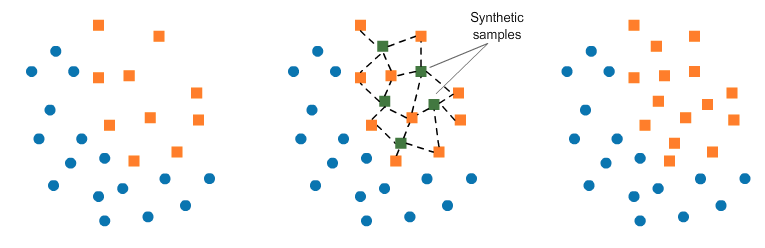
SMOTE algorithm works in 4 simple steps:

1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced

Original dataset shape Counter({0.0: 226145, 1.0: 19860})
Resample dataset shape Counter({1.0: 226145, 0.0: 226145})


1.0    226145
0.0    226145
Name: TARGET, dtype: int64

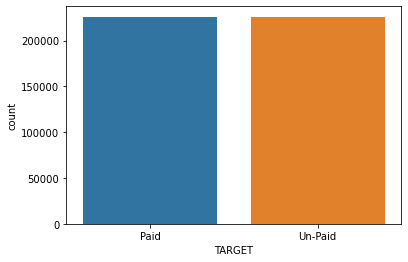

In [25]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=5,
              n_jobs=-1, random_state=14)

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

# visualize the target variable
g = sns.countplot(y_smote)
g.set_xticklabels(['Paid','Un-Paid']);

y_smote.value_counts()

In [26]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, dum_y_predict)
print(conf_mat)

[[56537     0]
 [ 4965     0]]


### 2.4.2 Resampling to reduce imbalance of the dataset

We will perform a cross-validation evaluation to get an estimate of the test score. [1](https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html)

As a baseline, we could use a classifier which will always predict the majority class independently of the features provided.


In [27]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
scoring = ["accuracy", "balanced_accuracy"]
cv_result = cross_validate(dummy_clf, x_train, y_train, scoring=scoring)
print(f"Accuracy score of a dummy classifier: {cv_result['test_accuracy'].mean():.3f}")


Accuracy score of a dummy classifier: 0.919


Instead of using the accuracy, we can use the balanced accuracy which will take into account the balancing issue.

In [28]:
print(
    f"Balanced accuracy score of a dummy classifier: "
    f"{cv_result['test_balanced_accuracy'].mean():.3f}"
)

Balanced accuracy score of a dummy classifier: 0.500


### 2.4.3 Strategies to learn from an imbalanced dataset
We will use a dictionary and a list to continuously store the results of our experiments and show them as a pandas dataframe.

In [29]:
index = []
scores = {"Accuracy": [], "Balanced accuracy": []}

### 2.4.3.1 Dummy baseline

Before to train a real machine learning model, we can store the results obtained with our DummyClassifier.

In [30]:
import pandas as pd

index += ["Dummy classifier"]
cv_result = cross_validate(dummy_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.91927,0.5


### 2.4.3.2 Linear classifier baseline

Let's create and evaluate our **LogisticRegression** classifier.

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

num_pipe = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
)

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector as selector

preprocessor_linear = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

In [33]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(preprocessor_linear, LogisticRegression(max_iter=1000))

In [34]:
index += ["Logistic regression"]
cv_result = cross_validate(lr_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.919270,0.500000
Logistic regression,0.919205,0.515558


We can see that our linear model not perform better than our dummy baseline. It is as well impacted by the class imbalance.

We can verify that something similar is happening with a tree-based model such as **RandomForestClassifier**. With this type of classifier, we will not need to scale the numerical data, and we will only need to ordinal encode the categorical data.

In [35]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

num_pipe = SimpleImputer(strategy="mean", add_indicator=True)
cat_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
)

preprocessor_tree = make_column_transformer(
    (num_pipe, selector(dtype_include="number")),
    (cat_pipe, selector(dtype_include="category")),
    n_jobs=2,
)

rf_clf = make_pipeline(
    preprocessor_tree, RandomForestClassifier(random_state=42, n_jobs=2)
)

In [36]:
index += ["Random forest"]
cv_result = cross_validate(rf_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.919270,0.500000
Logistic regression,0.919205,0.515558
Random forest,0.919335,0.500701


The **RandomForestClassifier** is as well affected by the class imbalanced, slightly less than the linear model. Now, we will present different approach to improve the performance of these 2 models.

### 2.4.4 Use class_weight

**Most of the models in scikit-learn have a parameter class_weight**. This parameter will affect the computation of the loss in linear model or the criterion in the tree-based model to penalize differently a false classification from the minority and majority class. We can set **class_weight="balanced" such that the weight applied is inversely proportional to the class frequency**. We test this parametrization in both linear model and tree-based model. [1](https://imbalanced-learn.org/stable/auto_examples/applications/plot_impact_imbalanced_classes.html)


### 2.4.4.1 Let's create and evaluate our **LogisticRegression** classifier using class_weight.

In [37]:
lr_clf.set_params(logisticregression__class_weight="balanced")

index += ["Logistic regression with balanced class weights"]
cv_result = cross_validate(lr_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.919270,0.500000
Logistic regression,0.919205,0.515558
Random forest,0.919335,0.500701
Logistic regression with balanced class weights,0.709181,0.704029



### 2.4.4.2 Let's create and evaluate our **Randomforestclassifier** classifier using class_weight.

In [38]:
rf_clf.set_params(randomforestclassifier__class_weight="balanced")

index += ["Random forest with balanced class weights"]
cv_result = cross_validate(rf_clf, x_train, y_train, scoring=scoring)
scores["Accuracy"].append(cv_result["test_accuracy"].mean())
scores["Balanced accuracy"].append(cv_result["test_balanced_accuracy"].mean())

df_scores = pd.DataFrame(scores, index=index)
df_scores

,Accuracy,Balanced accuracy
Dummy classifier,0.919270,0.500000
Logistic regression,0.919205,0.515558
Random forest,0.919335,0.500701
Logistic regression with balanced class weights,0.709181,0.704029
Random forest with balanced class weights,0.919278,0.500785


We can see that **using class_weight was really effective for the linear model**, alleviating the issue of learning from imbalanced classes. **However, the RandomForestClassifier is still biased toward the majority class, mainly due to the criterion which is not suited enough to fight the class imbalance**.

In [39]:
rf_clf.set_params(randomforestclassifier__class_weight="balanced")
clf = rf_clf.fit(x_train, y_train)
Y_Test_Pred = clf.predict(x_test)

In [40]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

generate_model_report(y_test, Y_Test_Pred)

Test Accuracy score , Precision metrics
Accuracy = 0.919190
Precision = 0.380952
Recall = 0.001611
F1 Score = 0.003209
ROCAUC :0.500691


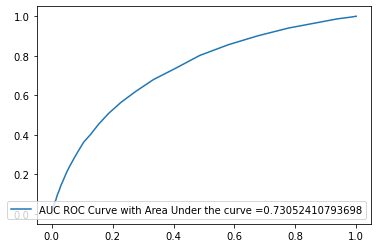

In [41]:
generate_auc_roc_curve(clf, x_test, y_test)

### 2.5 Confusion Matrix
For binary and multi-class classification problems, confusion matrix is another metrics which helps in indentifying which classes are easy to predict and which are hard to predict. It provides how many samples for each class are correctly classified and how many are confused with other classes.[1](https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn)

In [42]:
from sklearn.metrics import confusion_matrix
import itertools

# conf_mat = confusion_matrix(y_test, y_preds)
conf_mat = confusion_matrix(y_test, Y_Test_Pred)


print(conf_mat)

[[56524    13]
 [ 4957     8]]


**Confusion Matrix** for binary classification problems has the below-mentioned structure.[1](https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn)

[[TN, FP ]

[FN, TP ]]

**TN** refers to True Negative which is the count of labels which were originally belonged to negative class and model also predicted them as negative.<br>
**FP** refers to False positive which is the count of labels which were actually belonged to negative class but model predicted them as positive.<br>
**FN** refers to False Negative which is the count of labels which were actually belonged to Positive Class but model predicted them as negative.<br>
**TP** refers to True Positive which is the count of labels predicted positive which were actually positive.
Below we are plotting the confusion matrix as it helps in interpreting results fast.

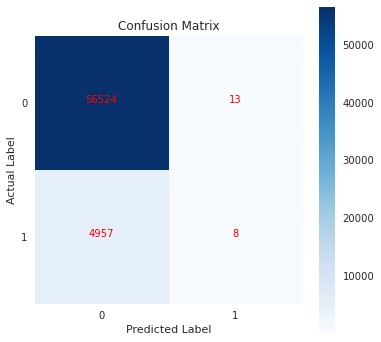

In [43]:
with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="red")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

### 3.3 Model Selection (PyCaret)
We'll use PyCaret to proceed to a fast spot checking of different classification models.

references:
[1](https://pycaret.gitbook.io/docs/get-started/installation),
[2](https://pycaret.gitbook.io/docs/get-started/quickstart),
[3](https://github.com/pycaret/pycaret/blob/master/examples/Fetal%20State%20Classification%20Tutorial%20-FSC101.ipynb)
[setup](https://pycaret.readthedocs.io/en/latest/api/classification.html)

### 3.3.1 Laoding data

In [44]:
def load_file():
    with timer("start reading data..."):
        df = pd.read_csv('../notebook/out.csv')
    
    # set new index
    df.set_index('SK_ID_CURR', inplace = True)

    # clean up, remove infinite and replace NaN values
    # use mean() to fill missing values
    df = infinity_na_values_table(df, fill_method=4)
    df.head()

    # Divide in training/validation and test data
    train_df = df[df['TARGET'] != 3]
    test_df = df[df['TARGET'] == 3].drop(['TARGET'], axis=1)
    print("Starting LightGBM. Train shape: {}, test shape: {}".format(train_df.shape, test_df.shape))

    ##### Pandas Get a List Of All Data Frames loaded into memory
    %who_ls DataFrame 

    ##### Pandas Get a List Of All Data Frames loaded into memory
    %who_ls DataFrame
    X_train = train_df.drop(['TARGET'], axis=1)
    Y_train = train_df['TARGET']
    X_test = test_df
    del df
    %who_ls DataFrame 

    print('Dataset Train/Test Sizes  : ',X_train.shape, Y_train.shape, X_test.shape)

    from sklearn.model_selection import train_test_split

    # Splitting a training set and a test set
    x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train,
                                              train_size=0.8, shuffle=True,
                                              stratify=Y_train,
                                              random_state=14)

    print()
    print('Dataset X Train Sizes : ', x_train.shape)
    print('Dataset X Test Sizes  : ', x_test.shape, )
    print('Dataset Y Train Sizes  : ', y_train.shape)
    print('Dataset Y Test Sizes  : ', y_test.shape)
    
    return x_train, x_test, y_train, y_test

In [45]:
x_train, x_test, y_train, y_test, data_unseen = load_file()

start reading data... - done in 53s

checking for infinity

printing the count of infinity values
It contains 21 infinite values

printing column name where infinity is present
PREV_APP_CREDIT_PERC_MAX          PREV_APP_CREDIT_PERC_MAX
REFUSED_APP_CREDIT_PERC_MAX    REFUSED_APP_CREDIT_PERC_MAX
INSTAL_PAYMENT_PERC_MAX            INSTAL_PAYMENT_PERC_MAX
dtype: object

printing row index with infinity 
Int64Index([106652, 170117, 191663, 203360, 214375, 247019, 249387, 262837,
            276278, 293754, 330828, 333092, 373540, 376062, 416262, 422089,
            432795, 439267, 453803, 119813],
           dtype='int64', name='SK_ID_CURR')

printing the count of Nan values
It contains 72051237 NaN values

No. of columns not containing null values
180

printing column name where NaN is present
AMT_ANNUITY                                              AMT_ANNUITY
AMT_GOODS_PRICE                                      AMT_GOODS_PRICE
DAYS_EMPLOYED                                          DAYS_E

### 3.3.2 Start processing pycaret

In [4]:
# check pycaret version

import pycaret
print('PyCaret: %s' % pycaret.__version__)
from pycaret.classification import *

PyCaret: 2.3.10


#### Setting up the dataset

In [47]:
import numpy as np
import pandas as pd


## sample returns a random sample from an axis of the object. That would be 22,800 samples, not 24,000
x_train_seen = x_train.sample(frac=0.95, random_state=786)
x_train_seen

# we remove from the original dataset this random data
data_unseen = x_train.drop(x_train_seen.index)
data_unseen

## we reset the index of both datasets
x_train_seen.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(x_train_seen.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (233705, 795)
Unseen Data For Predictions: (12300, 795)


In [ ]:
# setup the dataset

# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
# clf=setup(data=data,target='TARGET')
data = pd.concat([x_train, y_train

In [49]:
# setup the dataset

# Setting up the classifier
# Pass the complete dataset as data and the featured to be predicted as target
# clf=setup(data=data,target='TARGET')
data = pd.concat([x_train, y_train], axis=1)

clf = setup(data=data,
             target='TARGET',
             fix_imbalance=True,
             fold=10,
             silent=True)

,Description,Value
0,session_id,1626
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(246005, 796)"
5,Missing Values,False
6,Numeric Features,618
7,Categorical Features,177
8,Ordinal Features,False
9,High Cardinality Features,False


### saving our model 

In [50]:
# saving our model 
save_config('my_pycaret_model.pkl')

### Load config function

In [6]:
#load_config function with Example:
# PyCaret provides "pycaret.classification.load_config()" function.

# load_config function loads global variables from a pickle file into Python environment.


from pycaret.classification import load_config 

# "my_pycaret_model is already been saved" 
load_config('my_pycaret_model.pkl') 


In [7]:
del data, df_scores, test_df, train_df, x_smote, x_test, x_train

NameError: name 'data' is not defined

In [9]:
%who_ls DataFrame 

[]

In [10]:
# to get the training set effectively used to train the model

X_train_pycaret = get_config('X_train')
y_train_pycaret = get_config('y_train')
X_train_pycaret.shape, y_train_pycaret.shape

((172203, 750), (172203,))

In [11]:
# check out the available models

models(raise_errors=True)

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [12]:
# budget_time: int or float, default = None -->
#If not None, will terminate execution of the function after budget_time minutes have passed and return results up to that point.
# n_select: int, default = 1 -->
#Number of top_n models to return. For example, to select top 3 models use n_select = 3.
# compare_models()
# compare_models(budget_time = 0.5, n_select = 3)
compare_models(n_select = 3, include = ['lr','dt','rf','lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9192,0.7732,0.0300,0.5231,0.0568,0.0484,0.1105,80.2300
rf,Random Forest Classifier,0.9191,0.7139,0.0025,0.7533,0.0050,0.0045,0.0403,251.9540
dt,Decision Tree Classifier,0.8454,0.5398,0.1752,0.1390,0.1550,0.0712,0.0717,95.7480
lr,Logistic Regression,0.6317,0.5823,0.4648,0.1080,0.1670,0.0448,0.0657,200.4420


[LGBMClassifier(random_state=1626),
 RandomForestClassifier(n_jobs=-1, random_state=1626),
 DecisionTreeClassifier(random_state=1626)]

### Create the Light Gradient Boosting Machine(lightgbm) model

In [13]:
lightgbm_classifier=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9195,0.7747,0.0294,0.5616,0.0559,0.0482,0.1149
1,0.9191,0.7735,0.0237,0.5077,0.0452,0.0383,0.0963
2,0.9193,0.7714,0.0330,0.5287,0.0621,0.0531,0.1169
3,0.9196,0.7792,0.0344,0.5517,0.0648,0.0558,0.1230
4,0.9195,0.7744,0.0287,0.5479,0.0545,0.0469,0.1117
5,0.9182,0.7722,0.0316,0.4314,0.0588,0.0483,0.0992
6,0.9198,0.7804,0.0373,0.5714,0.0700,0.0607,0.1311
7,0.9184,0.7672,0.0265,0.4405,0.0500,0.0412,0.0922
8,0.9200,0.7661,0.0308,0.6232,0.0587,0.0515,0.1260


#### Let's now check the model hyperparameters

In [14]:
print(lightgbm_classifier)

LGBMClassifier(random_state=1626)


#### Tuning the hyperparametes for better performance

In [15]:
# Whenenver we compare different models or build a model, the model uses deault
#hyperparameter values. Hence, we need to tune our model to get better performance
tuned_lightgbm_classifier=tune_model(lightgbm_classifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9191,0.7478,0.0036,0.5556,0.0071,0.0061,0.0398
1,0.9193,0.7499,0.0057,0.7273,0.0114,0.0101,0.0599
2,0.9193,0.7458,0.0065,0.6923,0.0128,0.0113,0.0616
3,0.9189,0.7489,0.0029,0.4000,0.0057,0.0046,0.0282
4,0.9192,0.7482,0.0043,0.6667,0.0086,0.0075,0.0491
5,0.9192,0.7432,0.0050,0.5833,0.0100,0.0086,0.0486
6,0.9190,0.7525,0.0057,0.5000,0.0113,0.0095,0.0469
7,0.9186,0.7454,0.0022,0.2500,0.0043,0.0029,0.0164
8,0.9191,0.7423,0.0029,0.6667,0.0057,0.0050,0.0401


#### Compare hyperparameters of both models

In [16]:
print(lightgbm_classifier)

LGBMClassifier(random_state=1626)


In [17]:
print(tuned_lightgbm_classifier)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, feature_fraction=1.0,
               learning_rate=0.01, min_child_samples=26, min_split_gain=0.9,
               n_estimators=210, num_leaves=200, random_state=1626,
               reg_alpha=0.005, reg_lambda=0.4)


We can clearly conclude that our tuned model has performed better than our original model with default hyperparameters. The mean accuracy increased from 0.9899 to 0.9906

#### Saving the model for future prediction

In [18]:
## This can be used to save our trained model for future use.
save_model(tuned_lightgbm_classifier,"lightgbm_saved_model_tuned_2062022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(steps=[('dtypes',
                  DataTypes_Auto_infer(display_types=False,
                                       ml_usecase='classification',
                                       target='TARGET')),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_in_TestData(replacement_strategy='l...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LGBMClassifier(bagging_fraction=0.7, bagging_freq=1,
                            

#### Loading the saved model

In [19]:
## This can be used to load our model. We don't need to train our model again and again.
#tuned_lightgbm_classifier=load_model('lightgbm_saved_model_tuned_2062022')

#### Optimize hyperparameters

In [20]:
# lightgbm_classifier=create_model('lightgbm')

In [21]:
# Optimize The Model 
tuned_lightgbm_optimized=tune_model(lightgbm_classifier, optimize='Accuracy')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9191,0.7478,0.0036,0.5556,0.0071,0.0061,0.0398
1,0.9193,0.7499,0.0057,0.7273,0.0114,0.0101,0.0599
2,0.9193,0.7458,0.0065,0.6923,0.0128,0.0113,0.0616
3,0.9189,0.7489,0.0029,0.4000,0.0057,0.0046,0.0282
4,0.9192,0.7482,0.0043,0.6667,0.0086,0.0075,0.0491
5,0.9192,0.7432,0.0050,0.5833,0.0100,0.0086,0.0486
6,0.9190,0.7525,0.0057,0.5000,0.0113,0.0095,0.0469
7,0.9186,0.7454,0.0022,0.2500,0.0043,0.0029,0.0164
8,0.9191,0.7423,0.0029,0.6667,0.0057,0.0050,0.0401


In [22]:
## This can be used to save our trained model for future use.
save_model(tuned_lightgbm_optimized,"lightgbm_saved_model_optimized_2062022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(steps=[('dtypes',
                  DataTypes_Auto_infer(display_types=False,
                                       ml_usecase='classification',
                                       target='TARGET')),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='mean',
                                 target_variable=None)),
                 ('new_levels1',
                  New_Catagorical_Levels_in_TestData(replacement_strategy='l...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LGBMClassifier(bagging_fraction=0.7, bagging_freq=1,
                            

#### Load the model

In [23]:
## This can be used to load our model. We don't need to train our model again and again.
#model = load_model('lightgbm_saved_model_optimized_2062022')

####  Evaluate the Model

In [24]:
evaluate_model(tuned_lightgbm_optimized)

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.01
max_depth,-1
min_child_samples,26
min_child_weight,0.001
min_split_gain,0.9
n_estimators,210


#### Plot Performance of Model


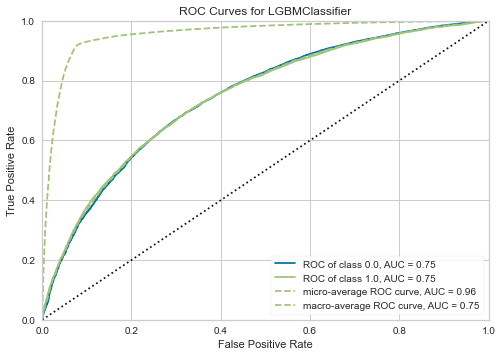

In [25]:
plot_model(tuned_lightgbm_optimized)

#### Plot Confusion Matrix

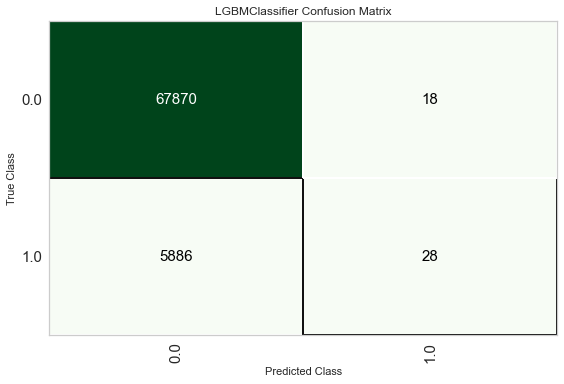

In [26]:
plot_model(tuned_lightgbm_optimized,plot='confusion_matrix')

#### Feature Importance


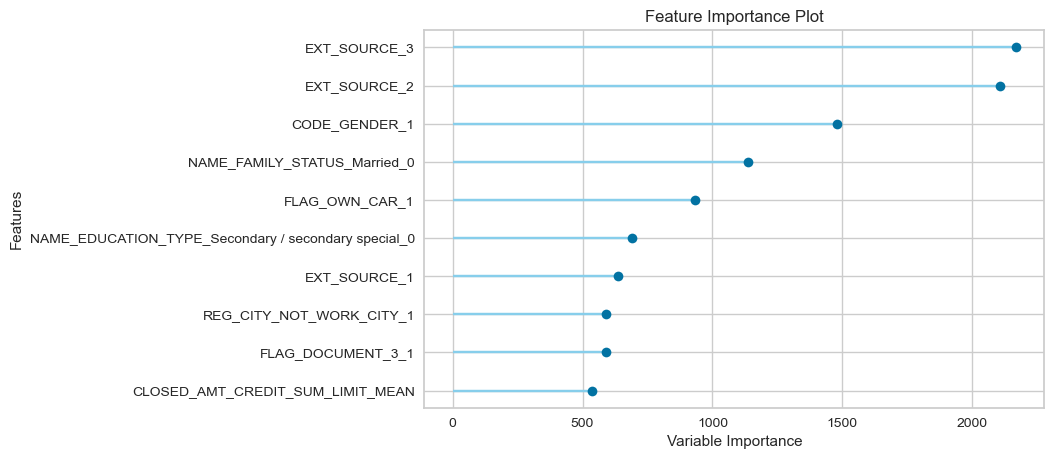

In [27]:
plot_model(tuned_lightgbm_optimized,plot='feature')

#### Validation Curve


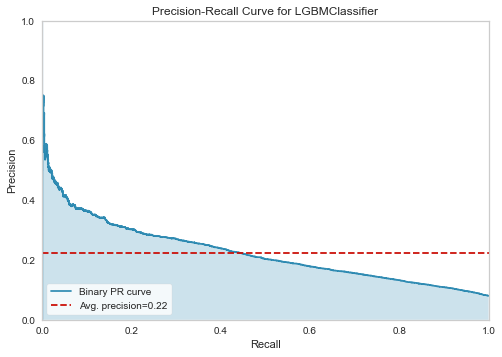

In [28]:
plot_model(tuned_lightgbm_optimized,plot='pr')

#### Predict on test / hold-out Sample

In [29]:
predict_model_1 = predict_model(tuned_lightgbm_optimized)
predict_model_1.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9200,0.7471,0.0047,0.6087,0.0094,0.0082,0.0486


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,...,WALLSMATERIAL_MODE_Others_0,WALLSMATERIAL_MODE_Panel_0,WALLSMATERIAL_MODE_Stone brick_1,WALLSMATERIAL_MODE_Wooden_1,EMERGENCYSTATE_MODE_No_1,EMERGENCYSTATE_MODE_Yes_0,BURO_CREDIT_TYPE_Mobile operator loan_MEAN_2.0437727243916015e-07,TARGET,Label,Score
0,225000.0,1687266.0,69763.5,1575000.0,0.008068,-13314.0,-5230.0,-3774.0,-5713.0,3.000000,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.8757
1,157500.0,490495.5,30136.5,454500.0,0.010147,-12585.0,-367.0,-11988.0,-4021.0,12.023767,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.6574
2,135000.0,339948.0,26437.5,315000.0,0.018634,-9475.0,-787.0,-308.0,-518.0,12.023767,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.8889
3,270000.0,1462500.0,73125.0,1462500.0,0.020246,-18623.0,-712.0,-5490.0,-2156.0,12.023767,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.8995
4,117000.0,170640.0,11403.0,135000.0,0.008625,-13584.0,-570.0,-6950.0,-1647.0,12.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.8143


The accuracy on the test set is 0.9293 compared to 0.9193 achieved on the tuned_lightgbm_optimized results. This is not a significant difference.

At the last column of this result we see a new feature called Score.
Label is the prediction and score is the probability of the prediction. Note that the predicted results are concatenated with the original data set, while all transformations are automatically performed in the background.



In [30]:
tuned_lightgbm_optimized

LGBMClassifier(bagging_fraction=0.7, bagging_freq=1, feature_fraction=1.0,
               learning_rate=0.01, min_child_samples=26, min_split_gain=0.9,
               n_estimators=210, num_leaves=200, random_state=1626,
               reg_alpha=0.005, reg_lambda=0.4)

#### Finalizing the Model

In [ ]:
final_tuned_lightgbm_optimized = finalize_model(tuned_lightgbm_optimized)